# PHÂN TÍCH DỮ LIỆU PHÒNG TRỌ - CATEGORICAL & MISSING DATA

## Mục tiêu:
1. Phân tích các cột phân loại (Categorical Columns) - bao gồm cả các cột tiện ích boolean
2. Phân tích dữ liệu thiếu (Missing Data)
3. Phân tích tin đăng thiếu thông tin tiện ích
4. Phân tích cột date theo tháng/năm

## Cấu trúc phân tích:
- **Task 1**: Categorical Columns Analysis
  - Phân tích cột location, street_name
  - Phân tích các cột tiện ích (boolean)
  - Value Distribution: Phân phối giá trị
  - Data Quality: Kiểm tra chất lượng dữ liệu
  
- **Task 2**: Date Analysis
  - Phân tích theo tháng
  - Phân tích theo năm
  - Xu hướng đăng tin theo thời gian
  
- **Task 3**: Missing Data Analysis
  - Overall Assessment: Đánh giá tổng quan
  - Per Column Strategy: Chiến lược xử lý từng cột
  
- **Task 4**: Utility Information Analysis
  - Tìm các tin đăng thiếu thông tin tiện ích
  - Đề xuất giải pháp xử lý

In [12]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Project setup
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

# Import TẤT CẢ hàm utility
from utilities.explore_data import (
    analyze_categorical_counts, 
    analyze_utilities, 
    analyze_time_trends,
    analyze_missing_values,
    load_data
)
from utilities.visualize import (
    plot_bar_chart, 
    plot_utility_percentages,
    plot_time_series,
    plot_missing_heatmap
)

# Load data
DATA_PATH = os.path.join(PROJECT_ROOT, "Data", "cleaned.csv")
df = load_data(DATA_PATH)

display(df.head())

Đã đọc dữ liệu thành công. Kích thước: (24121, 20)


,title,description,location,address,street_name,price,area,date,air_conditioning,fridge,washing_machine,mezzanine,kitchen,wardrobe,bed,balcony,elevator,free_time,parking,url
0,"Phòng riêng C3 phạm hùng - tạ quang bửu, gác s...",Cập nhật 10 giờ ngày 5 tháng 11 năm 2025: Giảm...,"Đường Phạm Hùng, Phường 5, Quận 8, Hồ Chí Minh",Quận 8 - Hồ Chí Minh,Phạm Hùng,2.8,30.0,2025-11-19,1,1,1,1,1,0,1,1,1,1,1,https://phongtro123.com/nha-tro-hem-c3-pham-hu...
1,Cần cho thuê phòng từ 1tr3-4tr Chung cư Era To...,Cho thuê phòng ở Chung cư Era Town Đức Khải - ...,"Đường Nguyễn Lương Bằng, Quận 7, Hồ Chí Minh",Quận 7 - Hồ Chí Minh,Nguyễn Lương Bằng,1.3,15.0,2025-11-16,1,1,1,1,1,1,1,1,1,1,1,https://phongtro123.com/phong-share-tro-chung-...
2,"Phòng trọ ngay Thành Thái, trung tâm Quận 10, ...","Cho thuê phòng trọ ngay trung tâm Quận 10, gần...","43/3 Đường Thành Thái, Quận 10, Hồ Chí Minh",Quận 10 - Hồ Chí Minh,Thành Thái,4.5,25.0,2025-11-06,1,1,1,1,1,0,0,1,1,1,1,https://phongtro123.com/phong-tro-ngay-thanh-t...
3,"Cực phẩm KTX, Phòng trọ, Sang, Xịn, Mịn Giá si...","> Giá trọn gói, không phát sinh bất cứ khoản p...","101 Đường số 8, Phường Linh Đông, Thủ Đức, Hồ ...",Thủ Đức - Hồ Chí Minh,Số 8,1.2,30.0,2025-11-11,1,1,1,1,1,1,1,1,1,1,1,https://phongtro123.com/cuc-pham-ktx-phong-tro...
4,"CHO THUÊ SLEEPBOX, KÍ TÚC XÁ HIỆN ĐẠI TẠI TRUN...","SLEEPBOX, KTX HIỆN ĐẠI VỊ TRÍ TRUNG TÂM TPHCM ...","361A Đường Phạm Ngũ Lão, Phường Bến Thành, Quậ...",Quận 1 - Hồ Chí Minh,Phạm Ngũ Lão,1.5,30.0,2025-11-14,1,1,1,1,1,0,1,1,1,1,1,https://phongtro123.com/cho-thue-sleepbox-ki-t...


## Task 1: Phân tích các cột phân loại (Categorical Columns)

### A. Phân tích cột text (location, street_name)
**Quy trình:**
- Đếm số lượng giá trị duy nhất (Unique values)
- Liệt kê Top 10 giá trị xuất hiện nhiều nhất
- Vẽ biểu đồ để quan sát sự mất cân bằng
- Kiểm tra chất lượng: Missing, Inconsistencies, Rare categories

### B. Phân tích cột tiện ích (Boolean columns)
**Quy trình:**
- Đếm số lượng True/False cho mỗi tiện ích
- Tính tỷ lệ phần trăm có/không có
- Vẽ biểu đồ tổng hợp tất cả tiện ích
- Phân tích mối tương quan giữa các tiện ích


TASK 1: PHÂN TÍCH CÁC CỘT PHÂN LOẠI

A. Các cột text cần phân tích:
['location', 'street_name']

--- Phân tích cột: location ---
location
Đường Cộng Hòa, Phường 13, Quận Tân Bình, Hồ Chí Minh               138
Đường Bạch Đằng, Phường 2, Quận Tân Bình, Hồ Chí Minh                96
Đường số 35CL, Phường Cát Lái, Quận 2, Hồ Chí Minh                   95
Đường Đặng Thuỳ Trâm, Phường 13, Quận Bình Thạnh, Hồ Chí Minh        81
Đường Xô Viết Nghệ Tĩnh, Phường 25, Quận Bình Thạnh, Hồ Chí Minh     74
Đường Nơ Trang Long, Phường 13, Quận Bình Thạnh, Hồ Chí Minh         72
Phố Lê Trọng Tấn, Phường Tây Thạnh, Quận Tân Phú, Hồ Chí Minh        72
Đường Trường Chinh, Phường 15, Quận Tân Bình, Hồ Chí Minh            66
Phố Lý Thường Kiệt, Phường 14, Quận 10, Hồ Chí Minh                  66
Đường Dương Quảng Hàm, Phường 5, Quận Gò Vấp, Hồ Chí Minh            64
Name: count, dtype: int64


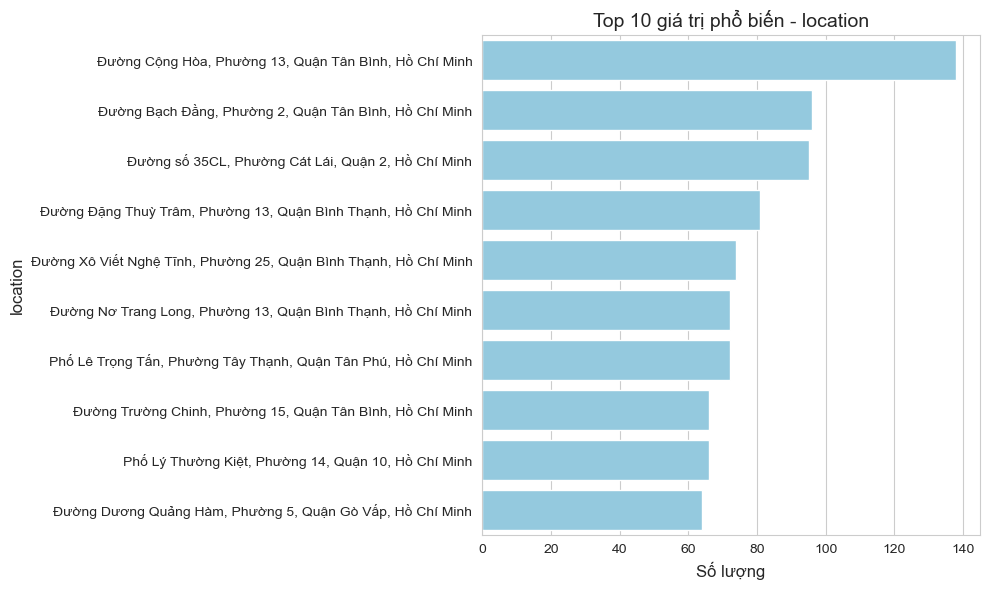


--- Phân tích cột: street_name ---
street_name
Số                     1012
Trường Chinh            396
Xô Viết Nghệ Tĩnh       359
Cách Mạng Tháng Tám     297
Cộng Hòa                285
Bạch Đằng               251
UNKNOWN                 244
Lê Đức Thọ              240
Lê Văn Sỹ               238
Dương Quảng Hàm         235
Name: count, dtype: int64


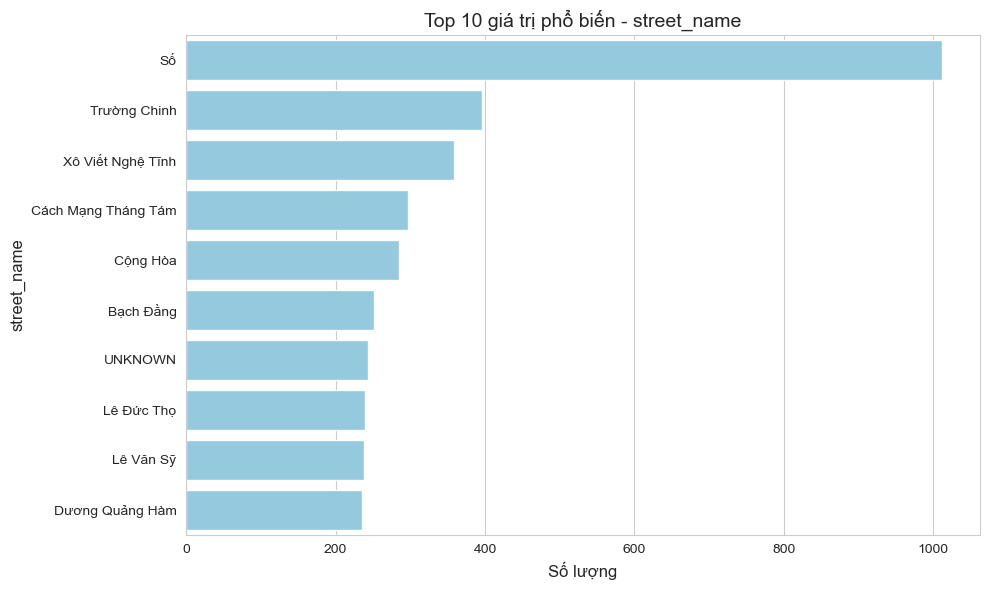

In [13]:
print("\n" + "="*60)
print("TASK 1: PHÂN TÍCH CÁC CỘT PHÂN LOẠI")
print("="*60)

# A. Phân tích cột text
exclude_cols = ['url', 'description', 'title', 'address', 'city', 'district']
cat_cols = (
    df.select_dtypes(include='object')
      .columns
      .difference(exclude_cols + ['date'])
)

print("\nA. Các cột text cần phân tích:")
print(list(cat_cols))

for col in cat_cols:
    print(f"\n--- Phân tích cột: {col} ---")
    result = analyze_categorical_counts(df, col, top_n=10)
    if result is not None:
        print(result)
        
        # Vẽ biểu đồ
        plot_bar_chart(
            data=result,
            title=f'Top 10 giá trị phổ biến - {col}',
            xlabel='Số lượng',
            ylabel=col,
            orientation='h',
            color='skyblue'
        )


B. PHÂN TÍCH CÁC CỘT TIỆN ÍCH (BOOLEAN)

Thống kê tiện ích:
             Utility  Count  Percentage
8           elevator  23770   98.544836
3          mezzanine  22603   93.706729
0   air_conditioning  22190   91.994528
2    washing_machine  21658   89.788981
7            balcony  21300   88.304797
9          free_time  20856   86.464077
10           parking  20534   85.129141
4            kitchen  20327   84.270967
1             fridge  19626   81.364786
6                bed  19203   79.611127
5           wardrobe  18365   76.136976


d:\Intro2DS\utilities\visualize.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Utility', y='Percentage', data=data, palette='viridis')


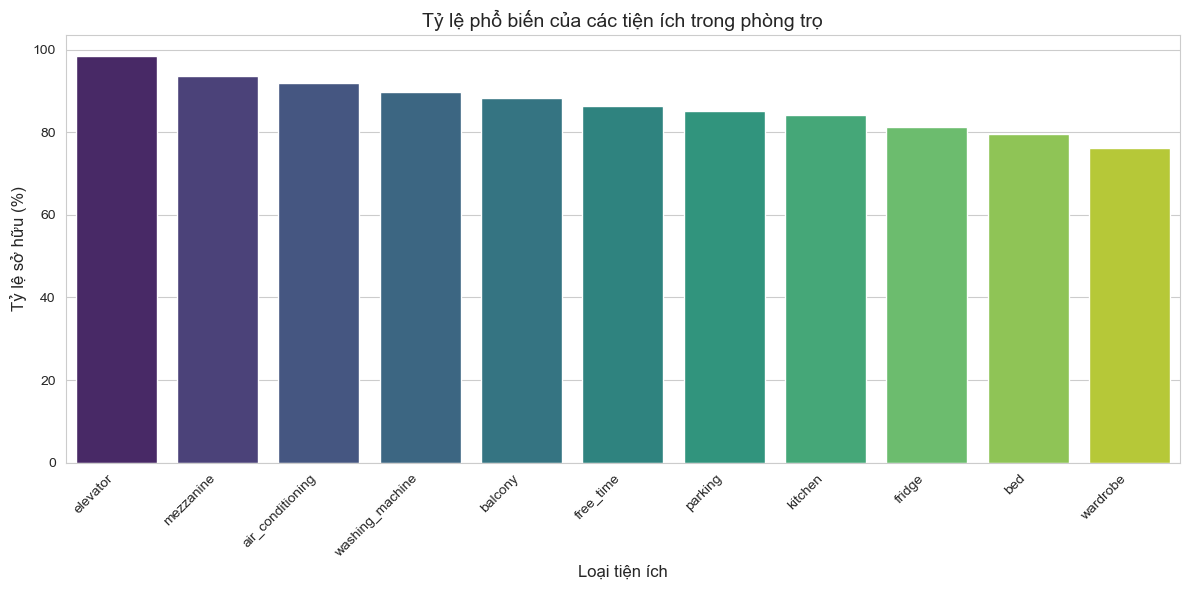

In [19]:
# B. Phân tích các cột tiện ích (Boolean)
print("\n" + "="*60)
print("B. PHÂN TÍCH CÁC CỘT TIỆN ÍCH (BOOLEAN)")
print("="*60)

utility_cols = ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine',
                'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator',
                'free_time', 'parking']

# Sử dụng hàm analyze_utilities
utility_stats = analyze_utilities(df, utility_cols)
print("\nThống kê tiện ích:")
print(utility_stats.to_string())

# Vẽ biểu đồ bằng hàm utility
plot_utility_percentages(
    data=utility_stats,
    title='Tỷ lệ phổ biến của các tiện ích trong phòng trọ')

## Task 2: Phân tích cột Date

### Quy trình phân tích:
**a. Phân tích theo Tháng:**
- Số lượng tin đăng mỗi tháng
- Xu hướng đăng tin theo tháng
- Tìm tháng có nhiều tin nhất/ít nhất

**b. Phân tích theo Năm:**
- Số lượng tin đăng mỗi năm
- Tăng trưởng qua các năm


TASK 2: PHÂN TÍCH CỘT DATE

Dữ liệu ngày tháng hợp lệ: 24113 dòng

--- A. Phân tích theo NĂM ---
  2018: 1 tin (0.00%)
  2020: 3 tin (0.01%)
  2023: 103 tin (0.43%)
  2024: 12006 tin (49.79%)
  2025: 12000 tin (49.77%)


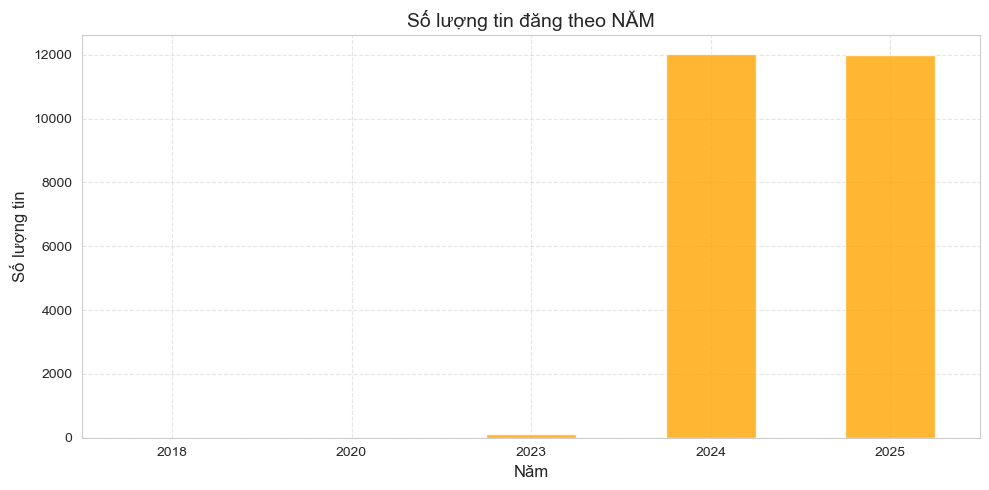

In [20]:
print("\n" + "="*60)
print("TASK 2: PHÂN TÍCH CỘT DATE")
print("="*60)

# Sử dụng hàm analyze_time_trends
year_counts, month_counts = analyze_time_trends(df, date_col='date')

if year_counts is not None and month_counts is not None:
    print(f"\nDữ liệu ngày tháng hợp lệ: {year_counts.sum()} dòng")

    # A. Phân tích theo NĂM
    print("\n--- A. Phân tích theo NĂM ---")
    total_valid = year_counts.sum()
    for year, count in year_counts.items():
        pct = (count / total_valid) * 100
        print(f"  {int(year)}: {count} tin ({pct:.2f}%)")

    # Vẽ biểu đồ năm
    plot_time_series(
        data=year_counts,
        title='Số lượng tin đăng theo NĂM',
        xlabel='Năm',
        ylabel='Số lượng tin',
        chart_type='bar'
    )


--- B. Phân tích theo THÁNG ---
  Tháng 1 (Jan): 538 tin (2.23%)
  Tháng 2 (Feb): 1436 tin (5.96%)
  Tháng 3 (Mar): 2720 tin (11.28%)
  Tháng 4 (Apr): 2165 tin (8.98%)
  Tháng 5 (May): 2231 tin (9.25%)
  Tháng 6 (Jun): 2089 tin (8.66%)
  Tháng 7 (Jul): 2557 tin (10.60%)
  Tháng 8 (Aug): 2550 tin (10.58%)
  Tháng 9 (Sep): 1943 tin (8.06%)
  Tháng 10 (Oct): 2605 tin (10.80%)
  Tháng 11 (Nov): 2277 tin (9.44%)
  Tháng 12 (Dec): 1002 tin (4.16%)


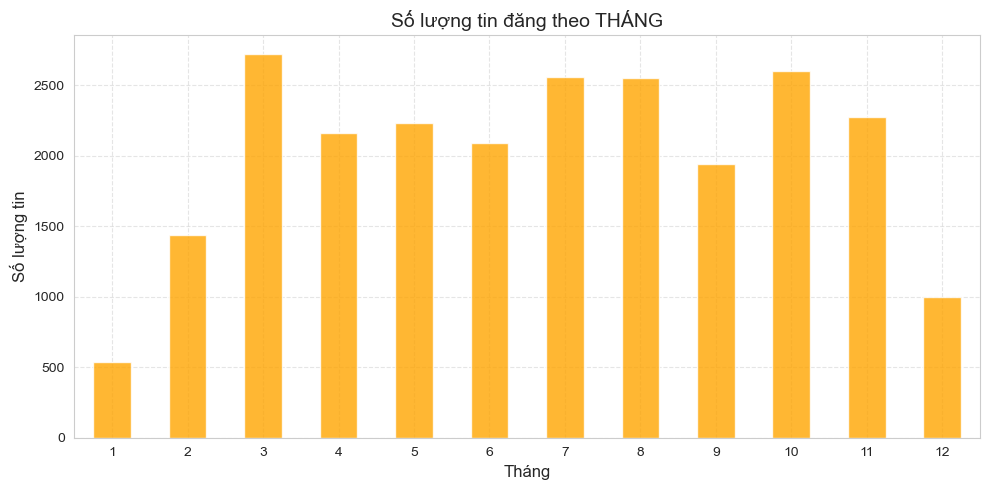

In [21]:
# B. Phân tích theo THÁNG
print("\n--- B. Phân tích theo THÁNG ---")
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month, count in month_counts.items():
    pct = (count / total_valid) * 100
    print(f"  Tháng {int(month)} ({month_names[int(month)-1]}): {count} tin ({pct:.2f}%)")

# Vẽ biểu đồ tháng
plot_time_series(
    data=month_counts,
    title='Số lượng tin đăng theo THÁNG',
    xlabel='Tháng',
    ylabel='Số lượng tin',
    chart_type='bar'
)

In [22]:
# C. Phân tích chi tiết theo NĂM-THÁNG
print("\n--- C. Phân tích chi tiết theo NĂM-THÁNG ---")

# Tạo dữ liệu year_month để phân tích chi tiết
df_date = df[df['date'].notna()].copy()
df_date['year'] = df_date['date'].dt.year
df_date['month'] = df_date['date'].dt.month
df_date['year_month'] = df_date['date'].dt.to_period('M')

year_month_counts = df_date['year_month'].value_counts().sort_index()

print(f"Top 5 tháng ít tin nhất:")
for ym, count in year_month_counts.head(5).items():
    print(f"  {ym}: {count} tin")

print(f"\nTop 5 tháng nhiều tin nhất:")
for ym, count in year_month_counts.tail(5).items():
    print(f"  {ym}: {count} tin")


--- C. Phân tích chi tiết theo NĂM-THÁNG ---
Top 5 tháng ít tin nhất:
  2018-06: 1 tin
  2020-03: 1 tin
  2020-04: 1 tin
  2020-07: 1 tin
  2023-05: 2 tin

Top 5 tháng nhiều tin nhất:
  2025-07: 1211 tin
  2025-08: 1599 tin
  2025-09: 1195 tin
  2025-10: 1439 tin
  2025-11: 1398 tin


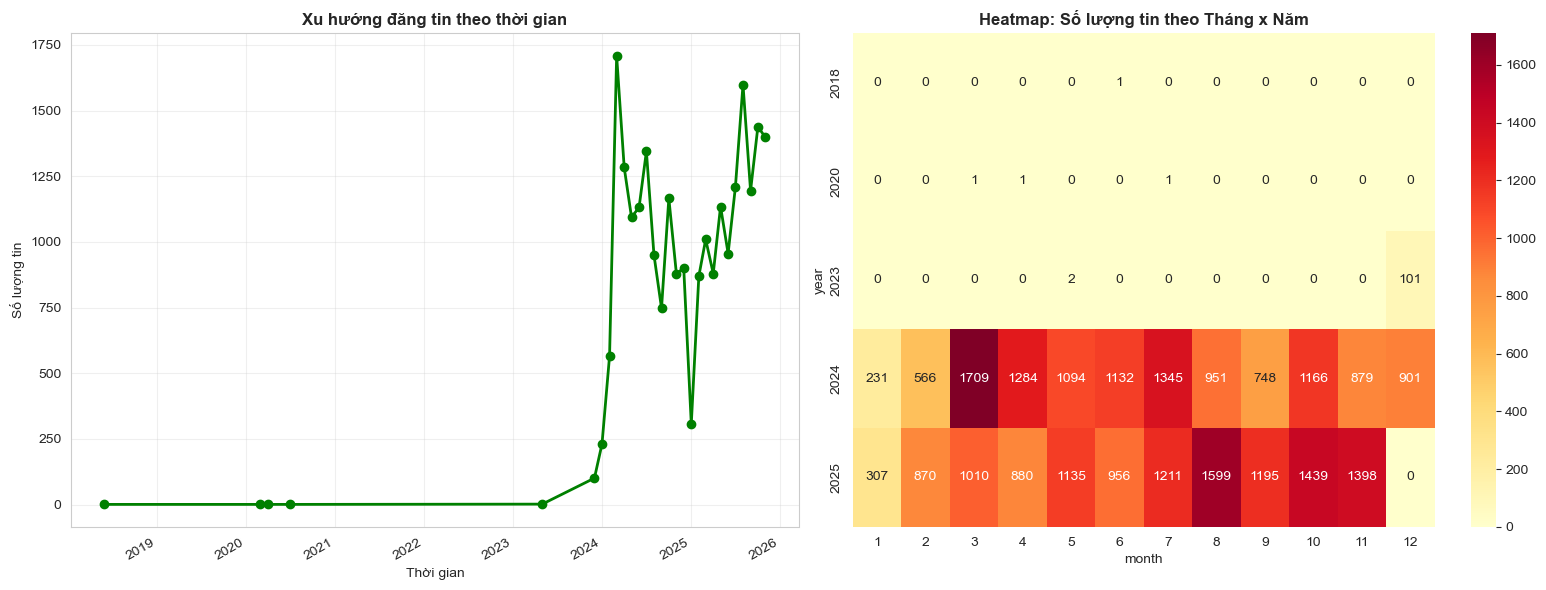


KẾT LUẬN PHÂN TÍCH THỜI GIAN
Tăng trưởng từ 2018 đến 2025: 1199900.00%
Tháng sôi động nhất: Tháng 3 - 2720 tin
Tháng ít hoạt động nhất: Tháng 1 - 538 tin


In [24]:
# Visualization tổng hợp
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Time series trend
year_month_counts.index = year_month_counts.index.to_timestamp()
year_month_counts.plot(kind='line', ax=axes[0], marker='o', color='green', linewidth=2)
axes[0].set_xlabel('Thời gian')
axes[0].set_ylabel('Số lượng tin')
axes[0].set_title('Xu hướng đăng tin theo thời gian', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 2. Heatmap
pivot_data = df_date.groupby(['year', 'month']).size().unstack(fill_value=0)
sns.heatmap(pivot_data, annot=True, fmt='d', cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Heatmap: Số lượng tin theo Tháng x Năm', fontweight='bold')

plt.tight_layout()
plt.show()

# Insights
print("\n" + "="*50)
print("KẾT LUẬN PHÂN TÍCH THỜI GIAN")
print("="*50)

if len(year_counts) > 1:
    year_growth = ((year_counts.iloc[-1] - year_counts.iloc[0]) / year_counts.iloc[0]) * 100
    print(f"Tăng trưởng từ {int(year_counts.index[0])} đến {int(year_counts.index[-1])}: {year_growth:.2f}%")

most_active = month_counts.idxmax()
least_active = month_counts.idxmin()
print(f"Tháng sôi động nhất: Tháng {int(most_active)} - {month_counts.max()} tin")
print(f"Tháng ít hoạt động nhất: Tháng {int(least_active)} - {month_counts.min()} tin")


## Task 3: Phân tích dữ liệu thiếu (Missing Data)

### Quy trình phân tích:
**a. Overall Assessment (Đánh giá tổng quan):**
- Lập bảng tổng hợp: Tên cột, số lượng thiếu, phần trăm thiếu
- Visualize: Vẽ Heatmap để xem sự phân bố của dữ liệu thiếu

**b. Per Column Strategy (Chiến lược xử lý):**
- Thiếu > 50%: Cân nhắc xóa cột
- Thiếu < 5%: Có thể xóa dòng hoặc điền giá trị
- Thiếu 5-50%: Điền giá trị (Mean/Median/Mode) hoặc tạo nhóm "Unknown"


TASK 3: PHÂN TÍCH DỮ LIỆU THIẾU

Bảng thống kê dữ liệu thiếu:

             Missing_Count  Missing_Percentage
price                   59            0.244600
description              8            0.033166
location                 8            0.033166
area                     8            0.033166
date                     8            0.033166
street_name              1            0.004146


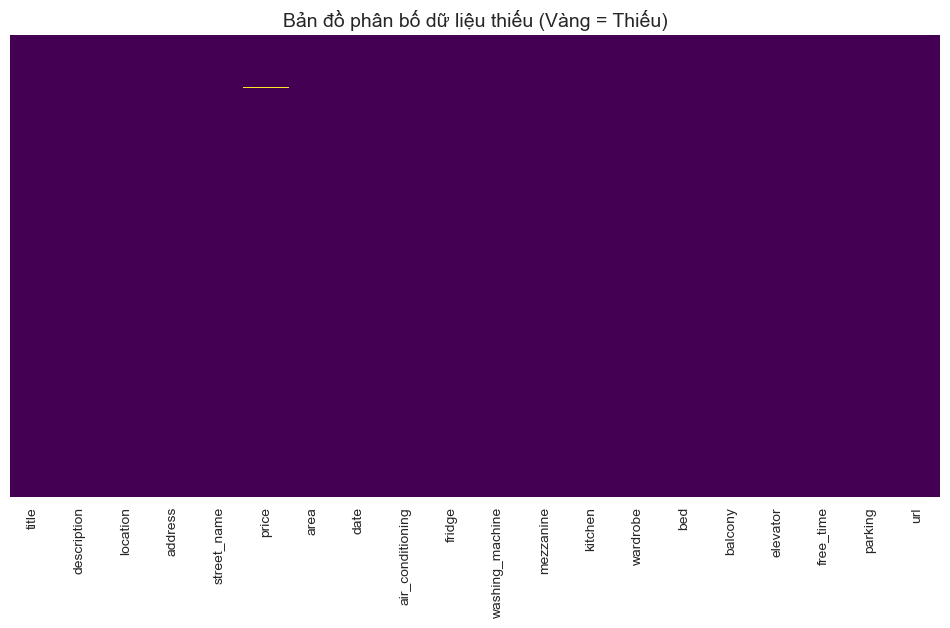

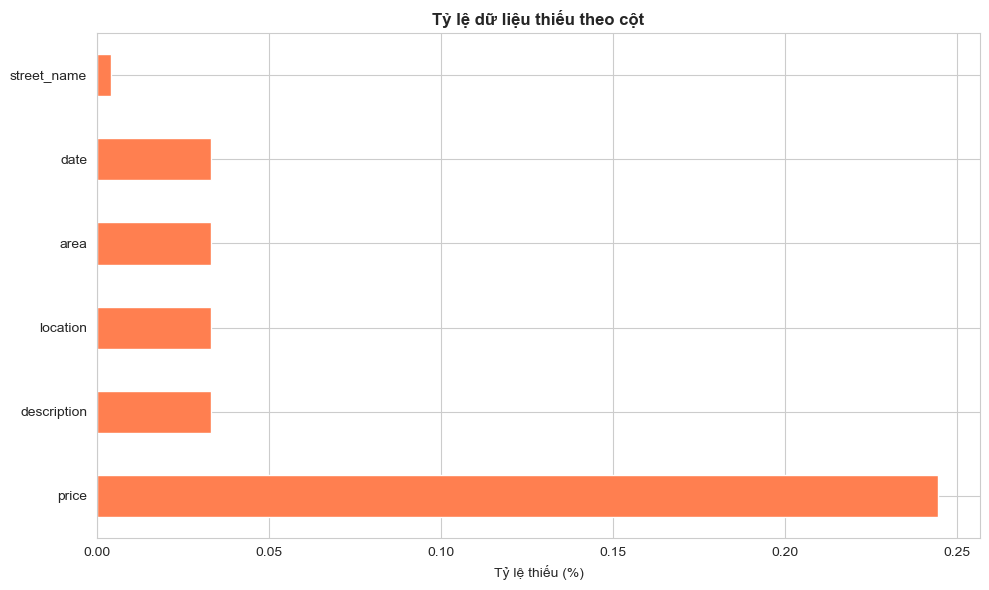


CHIẾN LƯỢC XỬ LÝ DỮ LIỆU THIẾU

Cột 'price' (59 giá trị thiếu - 0.24%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'description' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'location' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'area' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'date' (8 giá trị thiếu - 0.03%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset

Cột 'street_name' (1 giá trị thiếu - 0.00%):
  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị
  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset


In [25]:
print("\n" + "="*60)
print("TASK 3: PHÂN TÍCH DỮ LIỆU THIẾU")
print("="*60)

# Sử dụng hàm analyze_missing_values
missing_table = analyze_missing_values(df)

if not missing_table.empty:
    print("\nBảng thống kê dữ liệu thiếu:\n")
    print(missing_table.to_string())

    # Vẽ heatmap bằng hàm utility
    plot_missing_heatmap(df)

    # Vẽ bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_table['Missing_Percentage'].plot(kind='barh', ax=ax, color='coral')
    ax.set_xlabel('Tỷ lệ thiếu (%)')
    ax.set_title('Tỷ lệ dữ liệu thiếu theo cột', fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Strategy per column
    print("\n" + "="*60)
    print("CHIẾN LƯỢC XỬ LÝ DỮ LIỆU THIẾU")
    print("="*60)

    for col in missing_table.index:
        pct = missing_table.loc[col, 'Missing_Percentage']
        count = missing_table.loc[col, 'Missing_Count']

        print(f"\nCột '{col}' ({int(count)} giá trị thiếu - {pct:.2f}%):")

        if pct > 50:
            print("  ĐỀ XUẤT: XÓA CỘT (Drop column)")
            print("  -> Thiếu quá nhiều thông tin, khó khôi phục")
        elif pct < 5:
            print("  ĐỀ XUẤT: XÓA DÒNG (Drop rows) hoặc Điền giá trị")
            print("  -> Tỷ lệ thấp, ít ảnh hưởng đến dataset")
        else:
            print("  ĐỀ XUẤT: ĐIỀN GIÁ TRỊ (Imputation)")
            if df[col].dtype in ['int64', 'float64']:
                print("  -> Biến số: Điền bằng Mean/Median/KNN")
            else:
                print("  -> Biến phân loại: Điền Mode hoặc tạo nhóm 'Unknown'")
else:
    print("\nDataset hoàn hảo! Không có giá trị nào bị thiếu.")

## Task 4: Phân tích tin đăng thiếu thông tin tiện ích

### Mục đích:
Kiểm tra số lượng bản ghi mà TẤT CẢ các cột tiện ích đều = False/0

### Nguyên nhân có thể:
- Người đăng không tích chọn tiện ích khi đăng bài
- Thông tin tiện ích được viết trong phần mô tả (description)

### Hành động đề xuất:
- Nếu tỷ lệ > 20%: Cần Text Mining trên cột 'description'
- Nếu tỷ lệ 10-20%: Xem xét xử lý hoặc giữ nguyên
- Nếu tỷ lệ < 10%: Chấp nhận được


TASK 4: PHÂN TÍCH TIN ĐĂNG THIẾU THÔNG TIN TIỆN ÍCH

KẾT QUẢ TỔNG QUAN:
- Tổng số tin đăng: 24121
- Tin không có tiện ích nào: 19
- Tỷ lệ: 0.08%

Phân phối từng tiện ích:
  elevator: 23770 (98.54%)
  mezzanine: 22603 (93.71%)
  air_conditioning: 22190 (91.99%)
  washing_machine: 21658 (89.79%)
  balcony: 21300 (88.30%)
  free_time: 20856 (86.46%)
  parking: 20534 (85.13%)
  kitchen: 20327 (84.27%)
  fridge: 19626 (81.36%)
  bed: 19203 (79.61%)
  wardrobe: 18365 (76.14%)


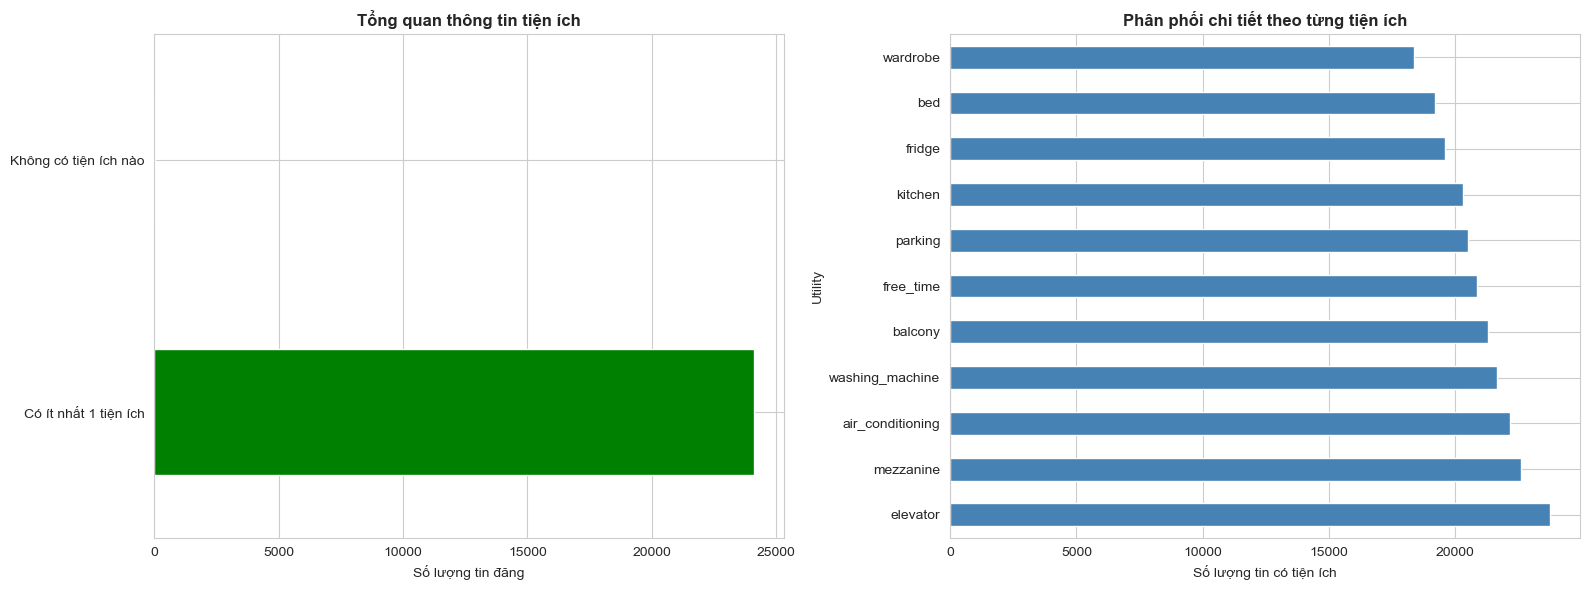


ĐÁNH GIÁ VÀ ĐỀ XUẤT

Tỷ lệ chấp nhận được!
- Dữ liệu khá đầy đủ về thông tin tiện ích

Mẫu 5 tin đăng không có tiện ích:
                                                                                title                                                               location  price  area  air_conditioning  fridge  washing_machine  mezzanine  kitchen  wardrobe  bed  balcony  elevator  free_time  parking
2684                                                          Rất tiếc, có lỗi xảy ra                                                                    NaN    NaN   NaN                 0       0                0          0        0         0    0        0         0          0        0
2994                                              Connection timed out Error code 522                                                                    NaN    NaN   NaN                 0       0                0          0        0         0    0        0         0          0        0
3021             

In [26]:
print("\n" + "="*60)
print("TASK 4: PHÂN TÍCH TIN ĐĂNG THIẾU THÔNG TIN TIỆN ÍCH")
print("="*60)

utility_cols = ['air_conditioning', 'fridge', 'washing_machine', 'mezzanine',
                'kitchen', 'wardrobe', 'bed', 'balcony', 'elevator',
                'free_time', 'parking']

# Tìm tin không có tiện ích nào
no_utilities_df = df[df[utility_cols].sum(axis=1) == 0]

count_no_utils = len(no_utilities_df)
total_rows = len(df)
percent_no_utils = (count_no_utils / total_rows) * 100

print(f"\nKẾT QUẢ TỔNG QUAN:")
print(f"- Tổng số tin đăng: {total_rows}")
print(f"- Tin không có tiện ích nào: {count_no_utils}")
print(f"- Tỷ lệ: {percent_no_utils:.2f}%")

# Sử dụng lại hàm analyze_utilities để có data đầy đủ
print(f"\nPhân phối từng tiện ích:")
utility_stats = analyze_utilities(df, utility_cols)
for _, row in utility_stats.iterrows():
    print(f"  {row['Utility']}: {int(row['Count'])} ({row['Percentage']:.2f}%)")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Overview
utilities_summary = pd.DataFrame({
    'Có ít nhất 1 tiện ích': [total_rows - count_no_utils],
    'Không có tiện ích nào': [count_no_utils]
}).T

utilities_summary.plot(kind='barh', ax=axes[0], legend=False, color=['green', 'red'])
axes[0].set_xlabel('Số lượng tin đăng')
axes[0].set_title('Tổng quan thông tin tiện ích', fontweight='bold')

# 2. Detail - sử dụng dữ liệu từ analyze_utilities
utility_stats.set_index('Utility')['Count'].plot(kind='barh', ax=axes[1], color='steelblue')
axes[1].set_xlabel('Số lượng tin có tiện ích')
axes[1].set_title('Phân phối chi tiết theo từng tiện ích', fontweight='bold')

plt.tight_layout()
plt.show()

# Recommendations
print(f"\n{'='*60}")
print("ĐÁNH GIÁ VÀ ĐỀ XUẤT")
print("="*60)

if percent_no_utils > 20:
    print("\nTỶ LỆ TIN THIẾU TIỆN ÍCH CAO!")
    print("\nĐỀ XUẤT:")
    print("1. Sử dụng Text Mining để trích xuất thông tin từ cột 'description'")
    print("2. Áp dụng NLP để tìm từ khóa:")
    print("   - 'máy lạnh', 'điều hòa' -> air_conditioning")
    print("   - 'tủ lạnh' -> fridge")
    print("   - 'máy giặt' -> washing_machine")
    print("   - 'gác', 'gác lửng' -> mezzanine")
elif percent_no_utils > 10:
    print("\nTỷ lệ trung bình, nên xử lý:")
    print("- Kiểm tra mô tả (description) để điền thông tin")
    print("- Hoặc có thể giữ nguyên nếu mục đích phân tích chấp nhận được")
else:
    print("\nTỷ lệ chấp nhận được!")
    print("- Dữ liệu khá đầy đủ về thông tin tiện ích")

if count_no_utils > 0:
    print(f"\nMẫu 5 tin đăng không có tiện ích:")
    sample_cols = ['title', 'location', 'price', 'area'] + utility_cols
    print(no_utilities_df[sample_cols].head().to_string())